<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Prediction Of Diabetes
</font>
</h1>

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Introduction
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: left; line-height:200%; font-family:camtasia; font-size:medium">
<font face="camtasia" size=3>
Diabetes is a chronic disease that affects millions of people worldwide and can lead to serious health complications if left untreated. Early diagnosis and prediction of diabetes can help patients receive timely treatment and prevent the onset of complications. On the other hand, XGBoost and CatBoost are powerful machine-learning models that can be used to predict diabetes based on patient data. By providing accurate predictions, these models can help healthcare professionals make informed decisions and improve patient outcomes. Once the model is trained and validated, it can be used to predict the diabetes status of new patients based on their medical data. This can be a valuable tool for healthcare professionals to identify patients who are at risk of developing diabetes and provide them with timely interventions to prevent or manage the disease
</font>
</p>

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Import the required libraries of the project
</font>
</h2>


In [17]:
# Import required libraries
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import metrics
from matplotlib import pyplot
import seaborn as sns
from catboost import CatBoostClassifier
import pandas as pd
from numpy import mean
from numpy import std

import warnings
warnings.filterwarnings('ignore')

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Reading Dataset
</font>
</h2>

In [9]:
diabetes = pd.read_csv('/content/drive/My Drive/diabetes.csv')
diabetes.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
More details about Dataset
</font>
</h2>

In [ ]:
diabetes.info()

In [ ]:
diabetes.describe()

In [ ]:
# Calculate the correlation matrix
corr_matrix = diabetes.corr()
fig, ax = pyplot.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
pyplot.show()

In [10]:
#Split dataset
x= diabetes.drop(columns='Diabetes')
y= diabetes['Diabetes']
X_train, X_val, y_train, y_val=train_test_split(x,y, shuffle=True, random_state=12, test_size=0.1)

In [11]:
# Scale the dataset using StandardScaler
scaler = StandardScaler()

X_V = X_val.values
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_val = scaler.transform(X_V)

In [15]:
# define the hyperparameter grid
param_grid = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.05, 0.01, 0.1],
    'max_depth': [2, 4, 6, 8],
    'l2_leaf_reg' : [2,4,6,8],
    'rsm' : [0.3,0.5,0.6],
}


# Define the XGBoost model
model = CatBoostClassifier()


# Perform grid search to find the best hyperparameters
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=kfold, n_jobs=-1)
grid_search.fit(scaled_x_train,y_train)

# Print the best hyperparameters and the corresponding score
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

0:	learn: 0.6172120	total: 48.2ms	remaining: 7.17s
1:	learn: 0.5537811	total: 50.7ms	remaining: 3.75s
2:	learn: 0.5033092	total: 52.3ms	remaining: 2.56s
3:	learn: 0.4586438	total: 53.8ms	remaining: 1.96s
4:	learn: 0.4227618	total: 55.7ms	remaining: 1.62s
5:	learn: 0.3906346	total: 57.2ms	remaining: 1.37s
6:	learn: 0.3604474	total: 58.7ms	remaining: 1.2s
7:	learn: 0.3382965	total: 60.3ms	remaining: 1.07s
8:	learn: 0.3150805	total: 61.9ms	remaining: 970ms
9:	learn: 0.2952771	total: 63.5ms	remaining: 889ms
10:	learn: 0.2789241	total: 65ms	remaining: 822ms
11:	learn: 0.2635316	total: 66.6ms	remaining: 766ms
12:	learn: 0.2488192	total: 68ms	remaining: 717ms
13:	learn: 0.2370366	total: 69.5ms	remaining: 675ms
14:	learn: 0.2263655	total: 71ms	remaining: 639ms
15:	learn: 0.2156871	total: 72.3ms	remaining: 605ms
16:	learn: 0.2067856	total: 73.8ms	remaining: 577ms
17:	learn: 0.2000012	total: 75.3ms	remaining: 552ms
18:	learn: 0.1918062	total: 76.8ms	remaining: 529ms
19:	learn: 0.1854921	total: 7

In [20]:
# setup hyperparameters for catboost
model = CatBoostClassifier(verbose=0, eval_metric='Accuracy',iterations=150,learning_rate=0.1 ,max_depth=4 ,l2_leaf_reg=6 ,rsm=0.6)
model.fit(scaled_x_train, y_train)
y_pred = model.predict(scaled_x_val)

# define the evaluation method
cv = StratifiedKFold(n_splits=10)

# evaluate the model on the dataset
n_scores = cross_val_score(model, scaled_x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Accuracy score (training): {0:.3f}".format(model.score(scaled_x_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(scaled_x_val, y_val)))

Mean Accuracy: 0.957 (0.012)
Accuracy score (training): 0.964
Accuracy score (validation): 0.954


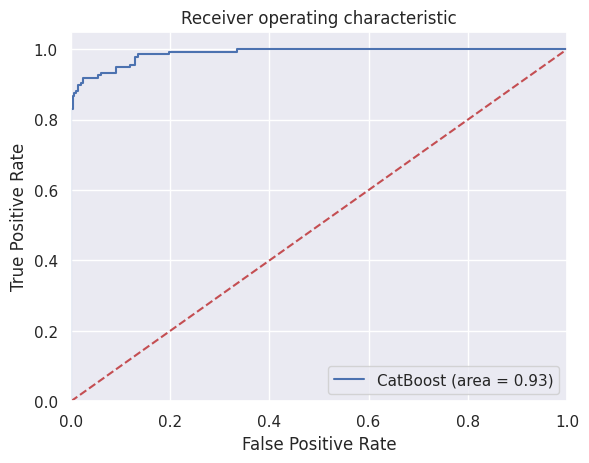

In [21]:
# ROC Curve
CatBoost_roc_auc = roc_auc_score(y_val, model.predict(scaled_x_val))
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(scaled_x_val)[:,1])
pyplot.figure()
pyplot.plot(fpr, tpr, label='CatBoost (area = %0.2f)' % CatBoost_roc_auc)
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.savefig('CatBoost_ROC')
pyplot.show()

In [22]:
#Confusion matrix, Accuracy, sensitivity and specificity
print(classification_report(y_val,y_pred))
cm = confusion_matrix(y_val, y_pred)
print('Confusion Matrix : \n', cm)

total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print('f1 score:', f1_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       295
           1       0.97      0.88      0.92       136

    accuracy                           0.95       431
   macro avg       0.96      0.93      0.94       431
weighted avg       0.95      0.95      0.95       431

Confusion Matrix : 
 [[291   4]
 [ 16 120]]
Sensitivity :  0.9864406779661017
Specificity :  0.8823529411764706
f1 score: 0.923076923076923


<Axes: >

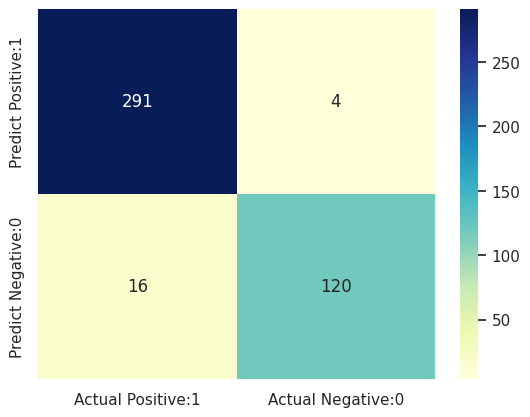

In [23]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')